<a href="https://colab.research.google.com/github/vinaykumargummadi/CineSense/blob/main/notebooks/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
file_path = "https://docs.google.com/spreadsheets/d/1Cc1S6Uish_ij8aSUQu0OG176ZLOQ5BfVDr6tBd2jdzA/export?format=csv#gid=1889275676"
df=pd.read_csv(file_path)

In [4]:
df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17712 entries, 0 to 17711
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   rotten_tomatoes_link              17712 non-null  object 
 1   movie_title                       17712 non-null  object 
 2   movie_info                        17391 non-null  object 
 3   critics_consensus                 9134 non-null   object 
 4   content_rating                    17712 non-null  object 
 5   genres                            17693 non-null  object 
 6   directors                         17518 non-null  object 
 7   authors                           16170 non-null  object 
 8   actors                            17360 non-null  object 
 9   original_release_date             16546 non-null  object 
 10  streaming_release_date            17328 non-null  object 
 11  runtime                           17398 non-null  float64
 12  prod

In [6]:
missing_percentage=np.round((df.isnull().sum()/len(df))*100,2)
missing_percentage.sort_values(ascending=False)

critics_consensus                   48.43
authors                              8.71
original_release_date                6.58
production_company                   2.82
audience_status                      2.53
streaming_release_date               2.17
actors                               1.99
movie_info                           1.81
runtime                              1.77
audience_count                       1.68
audience_rating                      1.67
directors                            1.10
tomatometer_status                   0.25
tomatometer_rating                   0.25
tomatometer_count                    0.25
genres                               0.11
tomatometer_top_critics_count        0.00
tomatometer_fresh_critics_count      0.00
rotten_tomatoes_link                 0.00
movie_title                          0.00
content_rating                       0.00
tomatometer_rotten_critics_count     0.00
dtype: float64

In [7]:
df.shape

(17712, 22)

In [8]:
df[['movie_title','movie_info']].sample(1).values

array([['Enter the Dangerous Mind',
        "A mentally unstable musician's (Jake Hoffman) already tenuous grip on reality shatters when he begins to obsess over the woman (Nikki Reed) he has just begun dating."]],
      dtype=object)

**Treat Missing Values: critics_consensus**  
Since the feature `critics_consensus` is haivng **48%** of missing values. We choose to omit them from further processsing.


In [9]:
df=df.drop('critics_consensus',axis=1)
df.columns

Index(['rotten_tomatoes_link', 'movie_title', 'movie_info', 'content_rating',
       'genres', 'directors', 'authors', 'actors', 'original_release_date',
       'streaming_release_date', 'runtime', 'production_company',
       'tomatometer_status', 'tomatometer_rating', 'tomatometer_count',
       'audience_status', 'audience_rating', 'audience_count',
       'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
       'tomatometer_rotten_critics_count'],
      dtype='object')

In [10]:
df.shape

(17712, 21)

In [11]:
df.content_rating.unique()

array(['PG', 'R', 'NR', 'G', 'PG-13', 'NC17'], dtype=object)

In [12]:
content_rating_dict={
    "PG":"Content that parents may want to know about",
    "NR":"Not Rated",
    "G":"Suitable for all ages",
    "PG-13":"Inappropriate for childeren under 13",
    "NC17":"Prohibited for under 18s"

}

**Treating Missing Values:movie_info**  
Since our `movie_info` feature is important for us on further analysis for the **Similarity Matcher** we don't want any null values.  
We are removing the missing values in this feature. [Around 321 values are being removed 1.8% of data]

In [13]:
df.movie_info.isnull().sum()

321

In [14]:
df=df[~df.movie_info.isnull()]
df.shape

(17391, 21)

In [15]:
df.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                             0
content_rating                         0
genres                                19
directors                            180
authors                             1446
actors                               329
original_release_date               1014
streaming_release_date               121
runtime                               30
production_company                   450
tomatometer_status                    14
tomatometer_rating                    14
tomatometer_count                     14
audience_status                      360
audience_rating                      209
audience_count                       210
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

**Treating Missing Values: original_release_date**  
Since our `original_release_date` feature is important for us on further analysis for the **EntityFilter** we don't want any null values.  
If any movie that has no release date (both original release date and streaming release date) we are removing it

In [16]:
empty_release_date = df[~df.original_release_date.isnull()]
df=empty_release_date[~empty_release_date.streaming_release_date.isnull()]

In [17]:
df.shape

(16273, 21)

In [18]:
df.isnull().sum()

rotten_tomatoes_link                   0
movie_title                            0
movie_info                             0
content_rating                         0
genres                                 7
directors                            154
authors                             1259
actors                               254
original_release_date                  0
streaming_release_date                 0
runtime                               17
production_company                   311
tomatometer_status                    11
tomatometer_rating                    11
tomatometer_count                     11
audience_status                      279
audience_rating                      129
audience_count                       130
tomatometer_top_critics_count          0
tomatometer_fresh_critics_count        0
tomatometer_rotten_critics_count       0
dtype: int64

**Treatment Missing values: actors (254 values)**  
We found a way to fill these values from the `movie_info` feature we can extract the cast name which are in paranthesis.  
Below sample form the orginal data is shown about the movie

**Example:**  
A teacher (Mariel Hemingway) and her husband try to reform two street urchins (Michael Caloz, Ben Cook) at their boys school in the country.

In the above shared example we can see the cast played in the movie an canadian movie LITTLE MAN the cast are shown in the paranthesis.

**Objective:**  
- Extract the cast names with in paranthesis and assign them into empy actors feature

In [19]:
#Filtering the data into two parts
df_with_actors = df[~df.actors.isnull()]
df_without_actors = df[df.actors.isnull()]
print(df_with_actors.actors.isnull().sum())
print(df_without_actors.actors.isnull().sum())

0
254


In [20]:
#Since this dataframe is having all movie_info with cast names we can able to fetch the actors names
df_without_actors.movie_info.isnull().sum()

0

In [21]:
def get_actors(text):
  regex=r'\((.*?)\)'
  actors_list = re.findall(regex,text)
  processed_actor_list=[]
  for actor in actors_list:
    if "," in actor:
      dummy=actor.split(', ')
      for i in dummy:
        processed_actor_list.append(i)
    else:
      processed_actor_list.append(actor)

  return ", ".join(processed_actor_list)

In [22]:
actors_list=get_actors("A teacher (Mariel Hemingway) and her husband try to reform two street urchins (Michael Caloz, Ben Cook) at their boys school in the country.")

In [23]:
actors_list

'Mariel Hemingway, Michael Caloz, Ben Cook'

In [24]:
df_without_actors['actors']=df_without_actors.movie_info.progress_apply(get_actors)

  0%|          | 0/254 [00:00<?, ?it/s]

In [25]:
df=pd.concat([df_with_actors,df_without_actors])

In [26]:
df.actors.isnull().sum()

0

In [48]:
top_production_houses=df.production_company.value_counts()
top_production_houses=top_production_houses.nlargest(10)
top_production_houses=top_production_houses.sort_values(ascending= False)

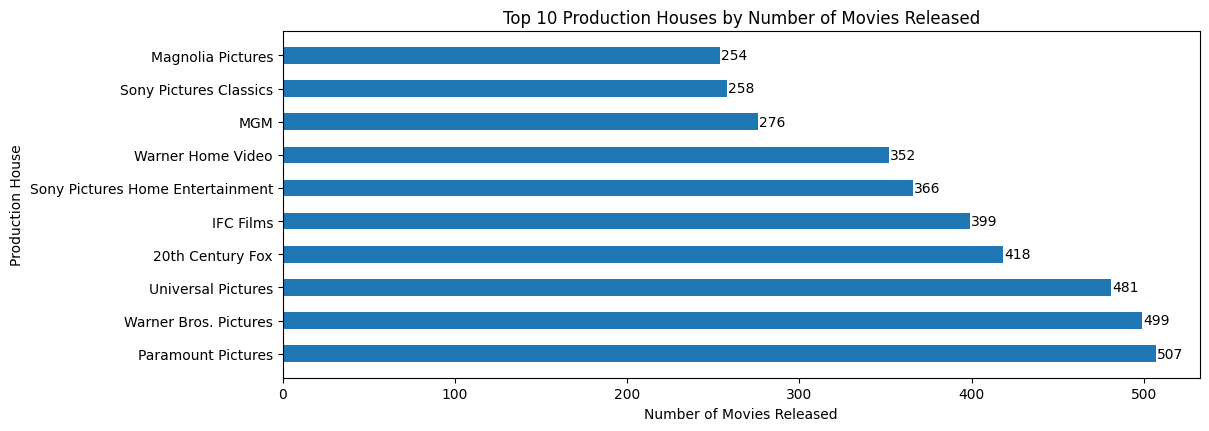

In [49]:
plt.figure(figsize=(12,4))
bars=plt.barh(top_production_houses.index,top_production_houses,height=0.5)
for bar, value in zip(bars, top_production_houses.values):
    plt.text(bar.get_width() + 0.7, bar.get_y() + bar.get_height() / 2, f'{value}',
             va='center', ha='left', fontsize=10)
plt.tight_layout()
plt.xlabel('Number of Movies Released')
plt.ylabel('Production House')
plt.title('Top 10 Production Houses by Number of Movies Released')
plt.show()

**Data Preprocessing**

In [ ]:
import re
from string import punctuation
import spacy
import nltk

from nltk.stem import WordNetLemmatizer
lemmatization_obj = WordNetLemmatizer()

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [ ]:
punctuation += '--'
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~--'

In [ ]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**PRE_PROCESS_TEXT:** Function applies all the neccesary steps from removing unwanted tags to STOPWORDS, punctuations as well. Also, finding the root cause of the word using `spacy: lemmatization`

In [ ]:
def pre_process_text(text):
  if isinstance(text,str):
    regex_cast = r"\((.*?)\)"
    cast_removed = re.sub(regex_cast, '', text, 0, re.MULTILINE)
    doc = nlp(cast_removed)
    punct_stop_removed= " ".join([word.text.lower()  for word in doc if word.text.lower() not in punctuation if word.text.lower() not in stop_words])
    word_lemma = " ".join([word.lemma_ for word in nlp(punct_stop_removed)])
    final_text = re.sub(r'\s+', ' ', word_lemma)
  else:
    return ""

  return final_text

making sure that our predefined function `pre_process_text` working fine with a sample text

In [ ]:
test_sample=df.movie_info.sample(1).values[0]
processed_text = pre_process_text(test_sample)
print(test_sample,'\n',processed_text)

In 1966, Antonio, a high school teacher in Spain, drives to Almeria to meet John Lennon and helps two runaways. 
 1966 antonio high school teacher spain drive almeria meet john lennon help two runaway


In [ ]:
#apply the pre-processing steps on the entire function
df['processed_movie_info'] = df.movie_info.progress_apply(pre_process_text)

  0%|          | 0/16273 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
path = r"/content/drive/MyDrive/01. DSML_ML Algorithms/CineSense/data"
# df.to_csv(path+"/processed_data.csv")

In [ ]:
df=pd.read_csv(path+"/processed_data.csv")

In [ ]:
df.head()

,Unnamed: 0,rotten_tomatoes_link,movie_title,movie_info,content_rating,genres,directors,authors,actors,original_release_date,...,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,processed_movie_info
0,0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76,always trouble prone life teenager percy jacks...
1,1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19,kate husband alex wealthy new yorkers prowl es...
2,2,m/10,10,"A successful, middle-aged Hollywood songwriter...",R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8,successful middle aged hollywood songwriter fa...
3,3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0,follow closing argument murder trial 12 member...
4,4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3,1866 professor pierre m. aronnax assistant con...


In [ ]:
def get_years(text):
  user_years=dict()
  early_match = re.search(r"early (\d{4})", text)
  late_match = re.search(r"late (\d{4})", text)
  between_match = re.search(r"between (\d{4}) and (\d{4})", text)

  early_year = early_match.group(1) if early_match else None
  late_year = late_match.group(1) if late_match else None
  between_start_year = between_match.group(1) if between_match else None
  between_end_year = between_match.group(2) if between_match else None

  user_years ={
      'early_year':int(early_year),
      'late_year':int(late_year),
      'between_start_year':int(between_start_year),
      'between_end_year':int(between_end_year)
  }
  return user_years

In [ ]:
get_years("I watched a movie in the early 2000s and it was again released in late 2010s but the movie between 1990 and 2000s are gold")

{'early_year': 2000,
 'late_year': 2010,
 'between_start_year': 1990,
 'between_end_year': 2000}

In [ ]:


text = "early 2000s and late 1900s and in between 2010 and 2012"

early_match = re.search(r"early (\d{4})", text)
late_match = re.search(r"late (\d{4})", text)
between_match = re.search(r"between (\d{4}) and (\d{4})", text)

early_year = early_match.group(1) if early_match else None
late_year = late_match.group(1) if late_match else None
between_start_year = between_match.group(1) if between_match else None
between_end_year = between_match.group(2) if between_match else None

print("Early:", early_year)
print("Late:", late_year)
print("Between:", between_start_year, "and", between_end_year)


In [ ]:
punctuation

In [ ]:
prompts = [
    "I recently watched a heartwarming romantic comedy set in a small town. The main characters, played by Sandra Bullock, Ryan Reynolds, and Betty White, navigate a fake engagement that turns into real love. It was released in 2009 and has a runtime of 108 minutes.",
    "If you're into action-packed movies, you should check out a film with breathtaking action sequences directed by George Miller. It has received widespread acclaim for its adrenaline-fueled chase scenes and stunning visual effects. I highly recommend it!",
    "I just saw a gripping thriller with unexpected twists and turns. The plot revolves around the disappearance of a woman named Amy Dunne, played by Rosamund Pike. It features a stellar cast including Ben Affleck and Neil Patrick Harris.",
    "For fans of visually stunning movies, there's a must-watch film directed by James Cameron. It transports you to the fantastical world of Pandora, filled with mesmerizing landscapes and groundbreaking CGI effects. It's perfect for fans of science fiction and adventure films.",
    "If you're looking for a thought-provoking drama, there's a classic choice that explores themes of hope, friendship, and redemption within the confines of Shawshank State Penitentiary. Featuring powerful performances by Tim Robbins and Morgan Freeman, it's considered one of the greatest films of all time."
]

In [ ]:
user_prompts = pd.DataFrame({"Prompt": prompts})
user_prompts